##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Pixel range (before normalization)
print(f"Pixel range: min={x_train.min()}, max={x_train.max()}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
Number of classes: 10
Pixel range: min=0, max=255


In [2]:
# Define class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


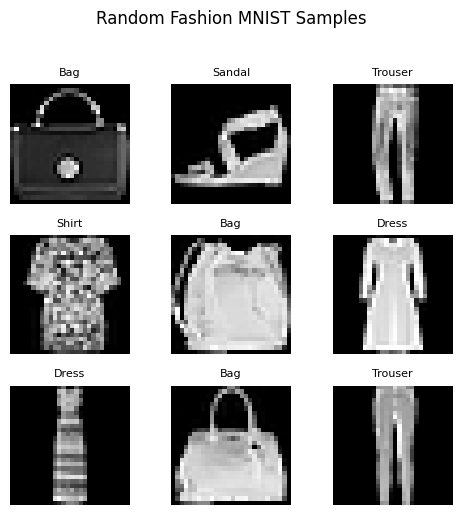

In [3]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(5, 5))
for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[index], cmap="gray")
    plt.title(class_names[y_train[index]], fontsize=8)
    plt.axis("off")
plt.suptitle("Random Fashion MNIST Samples", y=1.02)
plt.tight_layout()
plt.show()


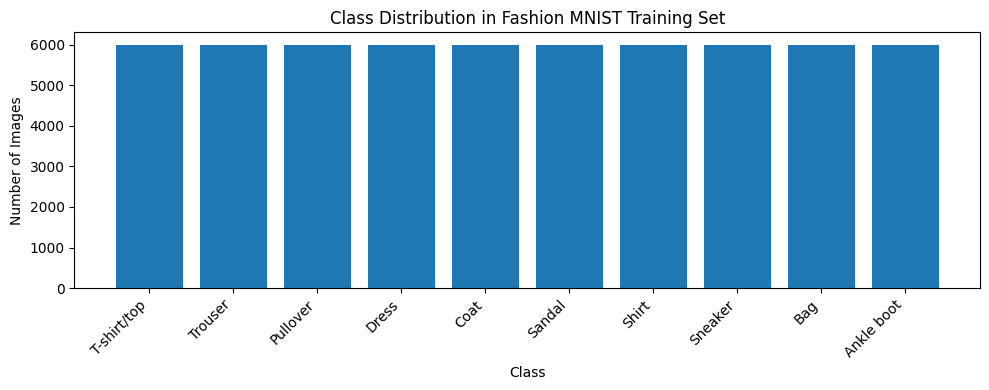

In [4]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train, minlength=len(class_names))

# Plot the class distribution
plt.figure(figsize=(10, 4))
plt.bar(class_names, class_counts)
plt.title("Class Distribution in Fashion MNIST Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [5]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Normalize pixel values for x_train and x_test
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension (28, 28) -> (28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

print("After preprocessing:")
print(f"x_train shape: {x_train.shape} | y_train shape: {y_train.shape}")
print(f"x_test  shape: {x_test.shape} | y_test  shape: {y_test.shape}")

# Build a CNN model
model = Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.3),

    Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


After preprocessing:
x_train shape: (60000, 28, 28, 1) | y_train shape: (60000,)
x_test  shape: (10000, 28, 28, 1) | y_test  shape: (10000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.7923 - loss: 0.5666 - val_accuracy: 0.8487 - val_loss: 0.3950
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8703 - loss: 0.3525 - val_accuracy: 0.8693 - val_loss: 0.3365
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8896 - loss: 0.3027 - val_accuracy: 0.8963 - val_loss: 0.2836
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9025 - loss: 0.2682 - val_accuracy: 0.8972 - val_loss: 0.2770
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9096 - loss: 0.2470 - val_accuracy: 0.9032 - val_loss: 0.2683
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9187 - loss: 0.2215 - val_accuracy: 0.9027 - val_loss: 0.2748
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9246 - loss: 0.2052 - val_accuracy: 0.9112 - val_loss: 0.2336
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9314 - loss: 0.1856 - 